In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/drive/My Drive/dataset/SpeedDating.csv',engine='python')
data.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8281.000000,...,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,8.963595,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,0.419551,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,6.134498,5.208251,1.960215,26.358928,7.662488,2.757186,3.784793,3.651645,2.122063,5.006762,...,7.332191,0.780825,0.981631,0.376950,1.230615,0.934132,24.384524,16.588583,19.411346,16.233415,10.898075,12.699142,31.330357,15.654266,16.679563,16.418155,7.823909,12.207837,25.610341,10.751267,11.524839,14.276783,9.207503,11.253802,24.970936,10.923285,11.952687,14.959108,9.526191,11.966270,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,5.491068,158.584899,0.370947,0.303539,0.489051,3.563648,1.230689,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,0.493515,1.950305,1.740575,1.550501,1.954078,1.794080,2.156163,1.841258,2.129354,0.245925,3.566763,3.758935,1.230905,2.845708,2.805237,1.407181,1.444531,...,1.521854,1.611694,1.382139,0.484683,1.294557,0.753902,13.712120,7.471537,6.124502,5.163777,5.900697,6.557041,17.551540,9.336288,7.880088,7.231325,6.100502,8.615985,17.477134,5.740351,6.004222,6.927869,6.385852,6.516178,17.007669,6.226283,7.010650,7.935509,6.403117,7.012067,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-0.830000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,4.000000,154.000000,0.000000,-0.020000,0.000000,24.000000,2.000000,15.000000,15.000000,17.390000,15.0000

In [3]:
data.shape

(8378, 195)

In [6]:
#where positin1 is null at that time many columns also have null values for all fields so it's good to remove it and the column list is given under
# attr7_3	sinc7_3	intel7_3	fun7_3	amb7_3	shar7_3	attr4_3	sinc4_3	intel4_3	fun4_3	amb4_3	shar4_3	attr2_3	sinc2_3	intel2_3	fun2_3	amb2_3	shar2_3 attr5_3	sinc5_3	intel5_3	fun5_3	amb5_3
data[data['positin1'].isnull()].head(8000)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,131,10.0,1,18,1,5,10,2,NaN,2,6,117.0,0,-0.17,0,21.0,2.0,20.0,10.0,20.0,20.0,20.0,10.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,19.0,Computer Science,5.0,NaN,NaN,NaN,4.0,...,NaN,0.0,0.0,0.0,NaN,0.0,40.0,20.0,20.0,10.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN
1842,131,10.0,1,18,1,5,10,5,NaN,5,10,119.0,0,0.48,0,19.0,3.0,50.0,15.0,10.0,10.0,10.0,5.0,0,2.0,7.0,6.0,2.0,NaN,1.0,3.0,7.0,2.0,19.0,Computer Science,5.0,NaN,NaN,NaN,4.0,...,NaN,0.0,0.0,0.0,NaN,0.0,40.0,20.0,20.0,10.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN
1843,131,10.0,1,18,1,5,10,3,NaN,3,11,120.0,0,0.54,0,20.0,3.0,10.0,10.0,35.0,35.0,8.0,2.0,0,7.0,8.0,6.0,5.0,7.0,2.0,5.0,5.0,2.0,19.0,Computer Science,5.0,NaN,NaN,NaN,4.0,...,NaN,0.0,0.0,0.0,NaN,0.0,40.0,20.0,20.0,10.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN
1844,131,10.0,1,18,1,5,10,10,NaN,10,12,121.0,0,0.52,0,21.0,2.0,35.0,15.0,5.0,30.0,15.0,0.0,1,7.0,10.0,10.0,8.0,10.0,1.0,9.0,1.0,2.0,19.0,Computer Science,5.0,NaN,NaN,NaN,4.0,...,NaN,0.0,0.0,0.0,NaN,0.0,40.0,20.0,20.0,10.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN


In [0]:
#drop the values where in positin1 column taking nan value
n_data = data.drop(data[data['positin1'].isnull()].index)

In [42]:
#our new data with 6532 rows and 195 columns
n_data.shape

(6532, 195)

In [43]:
n_data.head(1000)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
1846,132,1.0,0,1,1,6,5,2,2.0,5,1,137.0,0,0.16,0,26.0,4.0,17.39,17.39,15.22,17.39,13.04,19.57,1,8.0,8.0,9.0,8.0,9.0,7.0,7.0,6.0,1.0,27.0,Finance,8.0,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1847,132,1.0,0,1,1,6,5,2,2.0,2,2,138.0,0,0.34,1,32.0,2.0,20.00,20.00,20.00,20.00,6.67,13.33,1,8.0,7.0,4.0,6.0,6.0,4.0,8.0,6.0,2.0,27.0,Finance,8.0,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1848,132,1.0,0,1,1,6,5,2,2.0,3,4,139.0,0,0.52,0,37.0,4.0,18.75,16.67,18.75,20.83,12.50,12.50,1,8.0,NaN,8.0,8.0,7.0,NaN,8.0,6.0,2.0,27.0,Finance,8.0,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1849,132,1.0,0,1,1,6,5,2,2.0,4,6,140.0,1,0.13,1,29.0,2.0,18.60,16.28,18.60,18.60,11.63,16.28,1,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,1.0,27.0,Finance,8.0,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1850,132,1.0,0,1,1,6,5,2,2.0,1,10,141.0,0,0.05,0,28.0,3.0,20.83,20.83,16.67,16.67,6.25,18.75,1,8.0,7.0,7.0,7.0,7.0,8.0,7.0,7.0,1.0,27.0,Finance,8.0,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,205,12.0,0,23,2,9,20,13,13.0,10,14,227.0,0,0.28,1,26.0,2.0,20.00,16.00,18.00,16.00,16.00,14.00,0,3.0,5.0,6.0,5.0,5.0,3.0,3.0,3.0,2.0,23.0,climate change,10.0,NaN,NaN,NaN,2.0,...,NaN,0.0,1.0,0.0,NaN,NaN,16.67,16.67,16.67,16.67,16.67,16.67,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,12.0,12.0,12.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN
2842,205,12.0,0,23,2,9,20,13,13.0,5,15,228.0,0,0.64,0,24.0,4.0,13.51,18.92,21.62,13.51,13.51,18.92,1,6.0,7.0,7.0,4.0,7.0,6.0,5.0,4.0,2.0,23.0,climate change,10.0,NaN,NaN,NaN,2.0,...,NaN,0.0,1.0,0.0,NaN,NaN,16.67,16.67,16.67,16.67,16.67,16.67,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,12.0,12.0,12.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN
2843,205,12.0,0,23,2,9,20,13,13.0,8,16,229.0,0,0.55,1,28.0,2.0,21.43,16.67,21.43,16.67,11.90,11.90,0,3.0,5.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,23.0,climate change,10.0,NaN,NaN,NaN,2.0,...,NaN,0.0,1.0,0.0,NaN,NaN,16.67,16.67,16.67,16.67,16.67,16.67,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,12.0,12.0,12.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN
2844,205,12.0,0,23,2,9,20,13,13.0,17,17,230.0,0,0.08,1,42.0,2.0,23.81,23.81,23.81,23.81,2.38,2.38,1,6.0,8.0,8.0,8.0,5.0,6.0,7.0,5.0,2.0,23.0,climate change,10.0,NaN,NaN,NaN,2.0,...,NaN,0.0,1.0,0.0,NaN,NaN,16.67,16.67,16.67,16.67,16.67,16.67,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN

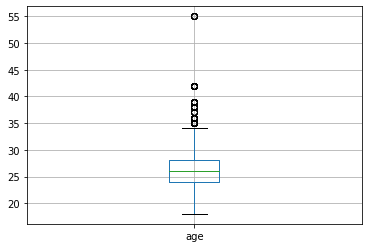

In [44]:
data.boxplot(column=['age'])

In [0]:
#In this dataset there is income value like 67,665 so we have to remove ',' in all income values 
n_data['income']=n_data['income'].str.replace(',','').astype(float)

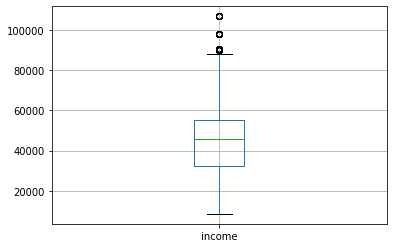

In [46]:
n_data['income'].mean()
n_data.boxplot(column=['income'])

In [0]:
#fill all the other null values with median also replace with mean or anyother you like
n_data = n_data.fillna(data.median())

In [0]:
#our data set has very long range of feature so we need to do feature extraction
#here we use Principle Component Analysis (PCA) is a common feature extraction method in data science.
#for that we need to convert our categorical features into numeric
n_data['career'] = n_data['career'].astype('category')
n_data['from'] = n_data['from'].astype('category')
n_data['field'] = n_data['field'].astype('category')
n_data['zipcode'] = n_data['zipcode'].astype('category')


In [49]:
cat_columns = n_data.select_dtypes(['category']).columns
cat_columns

Index(['field', 'from', 'zipcode', 'career'], dtype='object')

In [50]:
n_data[cat_columns] = n_data[cat_columns].apply(lambda x: x.cat.codes)
n_data['field']

1846    68
1847    68
1848    68
1849    68
1850    68
        ..
8373    33
8374    33
8375    33
8376    33
8377    33
Name: field, Length: 6532, dtype: int16

In [51]:
n_data['career']

1846     18
1847     18
1848     18
1849     18
1850     18
       ... 
8373    207
8374    207
8375    207
8376    207
8377    207
Name: career, Length: 6532, dtype: int16

In [52]:
n_data['zipcode']

1846    302
1847    302
1848    302
1849    302
1850    302
       ... 
8373    232
8374    232
8375    232
8376    232
8377    232
Name: zipcode, Length: 6532, dtype: int16

In [53]:
n_data['from']

1846    94
1847    94
1848    94
1849    94
1850    94
        ..
8373    60
8374    60
8375    60
8376    60
8377    60
Name: from, Length: 6532, dtype: int16

In [0]:
n_data.drop(['undergra','mn_sat','tuition'], axis=1,inplace=True)

In [62]:
n_data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,race,imprace,imprelig,from,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
1846,132,1.0,0,1,1,6,5,2,2.0,5,1,137.0,0,0.16,0,26.0,4.0,17.39,17.39,15.22,17.39,13.04,19.57,1,8.0,8.0,9.0,8.0,9.0,7.0,7.0,6.0,1.0,27.0,68,8.0,2.0,10.0,1.0,94,...,7.0,0.0,1.0,0.0,1.0,1.0,20.0,16.67,20.0,16.33,10.0,14.29,25.0,15.0,18.0,17.0,10.0,10.0,20.0,10.0,10.0,12.0,9.0,10.0,20.0,10.0,10.0,15.0,10.0,10.0,7.0,8.0,8.0,8.0,8.0,7.0,8.0,8.0,7.0,7.0
1847,132,1.0,0,1,1,6,5,2,2.0,2,2,138.0,0,0.34,1,32.0,2.0,20.00,20.00,20.00,20.00,6.67,13.33,1,8.0,7.0,4.0,6.0,6.0,4.0,8.0,6.0,2.0,27.0,68,8.0,2.0,10.0,1.0,94,...,7.0,0.0,1.0,0.0,1.0,1.0,20.0,16.67,20.0,16.33,10.0,14.29,25.0,15.0,18.0,17.0,10.0,10.0,20.0,10.0,10.0,12.0,9.0,10.0,20.0,10.0,10.0,15.0,10.0,10.0,7.0,8.0,8.0,8.0,8.0,7.0,8.0,8.0,7.0,7.0
1848,132,1.0,0,1,1,6,5,2,2.0,3,4,139.0,0,0.52,0,37.0,4.0,18.75,16.67,18.75,20.83,12.50,12.50,1,8.0,7.0,8.0,8.0,7.0,6.0,8.0,6.0,2.0,27.0,68,8.0,2.0,10.0,1.0,94,...,7.0,0.0,1.0,0.0,1.0,1.0,20.0,16.67,20.0,16.33,10.0,14.29,25.0,15.0,18.0,17.0,10.0,10.0,20.0,10.0,10.0,12.0,9.0,10.0,20.0,10.0,10.0,15.0,10.0,10.0,7.0,8.0,8.0,8.0,8.0,7.0,8.0,8.0,7.0,7.0
1849,132,1.0,0,1,1,6,5,2,2.0,4,6,140.0,1,0.13,1,29.0,2.0,18.60,16.28,18.60,18.60,11.63,16.28,1,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,1.0,27.0,68,8.0,2.0,10.0,1.0,94,...,7.0,0.0,1.0,0.0,1.0,1.0,20.0,16.67,20.0,16.33,10.0,14.29,25.0,15.0,18.0,17.0,10.0,10.0,20.0,10.0,10.0,12.0,9.0,10.0,20.0,10.0,10.0,15.0,10.0,10.0,7.0,8.0,8.0,8.0,8.0,7.0,8.0,8.0,7.0,7.0
1850,132,1.0,0,1,1,6,5,2,2.0,1,10,141.0,0,0.05,0,28.0,3.0,20.83,20.83,16.67,16.67,6.25,18.75,1,8.0,7.0,7.0,7.0,7.0,8.0,7.0,7.0,1.0,27.0,68,8.0,2.0,10.0,1.0,94,...,7.0,0.0,1.0,0.0,1.0,1.0,20.0,16.67,20.0,16.33,10.0,14.29,25.0,15.0,18.0,17.0,10.0,10.0,20.0,10.0,10.0,12.0,9.0,10.0,20.0,10.0,10.0,15.0,10.0,10.0,7.0,8.0,8.0,8.0,8.0,7.0,8.0,8.0,7.0,7.0


In [0]:
n_data = n_data.fillna(n_data.median())


from sklearn.decomposition import PCA
pca = PCA().fit(X)


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [0]:
df_X, y = n_data.drop(['match'], axis=1), n_data['match']

In [75]:
df_X.shape

(6532, 191)

In [0]:
df_X = df_X.fillna(n_data.median())

In [77]:
y.unique()

array([0, 1])

In [78]:
n_data.shape

(6532, 192)

In [80]:
np.sum(df_X.isnull().sum())

0

In [81]:
null_col = df_X.isnull().sum() > 0
null_col[null_col != 0]

Series([], dtype: bool)

In [0]:
df_X.drop(['undergra','tuition','mn_sat'],axis=1,inplace=True)

In [84]:
X = StandardScaler().fit_transform(df_X)
X

array([[-1.75288291, -1.45739982, -1.        , ...,  0.02793266,
        -0.05142249, -0.01571901],
       [-1.75288291, -1.45739982, -1.        , ...,  0.02793266,
        -0.05142249, -0.01571901],
       [-1.75288291, -1.45739982, -1.        , ...,  0.02793266,
        -0.05142249, -0.01571901],
       ...,
       [ 1.70194403,  2.28393432,  1.        , ...,  1.36952178,
        -2.19769522, -1.06343911],
       [ 1.70194403,  2.28393432,  1.        , ...,  1.36952178,
        -2.19769522, -1.06343911],
       [ 1.70194403, -0.21028844,  1.        , ...,  1.36952178,
        -2.19769522, -1.06343911]])

In [0]:
pca = PCA().fit(X)

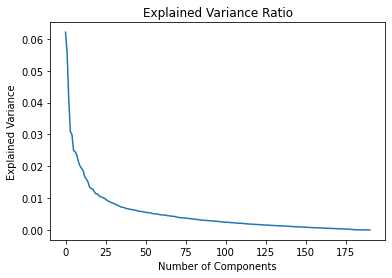

In [86]:
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()


In [87]:
pca_reduced = PCA(n_components=25).fit_transform(X)
pca_reduced.shape

(6532, 25)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(pca_reduced,y,random_state=23)


In [0]:
#random forest model applying on it
rand_forest = RandomForestClassifier(n_estimators=300,oob_score=True)
rf_fit = rand_forest.fit(X_train,y_train)
rf_predict = rf_fit.predict(X_test)

In [90]:
print("Accuracy Score: {:.2f}".format(metrics.accuracy_score(y_test,rf_predict)))
print("Precision Score: {:.2f}".format(metrics.precision_score(y_test,rf_predict)))
print("Recall Score: {:.2f}".format(metrics.recall_score(y_test,rf_predict)))


Accuracy Score: 0.87
Precision Score: 0.72
Recall Score: 0.34


In [91]:
confusion_matrix(y_test,rf_predict)


array([[1332,   36],
       [ 174,   91]])